# Video games sales data analysis 3
Analysis of the dataset from https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
It contains historical sales for game publishers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import transforms
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

### Barplots
1. Use barplots to show which platform has most games
2. Create barplots that show which studio has most released titles
3. Create horizontal barplots that show ranking of the companies that released most titles

In [2]:
games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
games.drop_duplicates
print(games.isnull().sum())
print("shape:", games.shape) #16719 titles but also there may be one title for different platforms
#count titles by platform
gbyplat=games.Platform.value_counts()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64
shape: (16719, 16)


#### Use function rainbow_text to customize barplot slightly

In [3]:
def rainbow_text(x, y, strings, colors, ax=None, **kw):
    """
    Take a list of ``strings`` and ``colors`` and place them next to each
    other, with text strings[i] being shown in colors[i].

    This example shows how to do both vertical and horizontal text, and will
    pass all keyword arguments to plt.text, so you can set the font size,
    family, etc.

    The text will get added to the ``ax`` axes, if provided, otherwise the
    currently active axes will be used.
    """
    if ax is None:
        ax = plt.gca()
    t = ax.transData
    canvas = ax.figure.canvas
    
    #way to retrieve y label coords
    
    lab = ax.set_ylabel("".join(strings))
    #print(lab)
    canvas.draw()
    labex = lab.get_window_extent()
    #print(labex)
    t = ax.transAxes
    #print('t', t)
    labex_data = t.inverted().transform((labex.x0, labex.y0- labex.height/2.))
    #print('labex_data', labex_data)
    ax.set_ylabel("")

    # vertical version
    for s, c in zip(strings, colors):
        text = ax.text(labex_data[0]+x, labex_data[1]+y, s, color=c, transform=t,
                       rotation=90, va='bottom', ha='center', **kw) #changed s without spacing, so can be used for one word only
        text.draw(canvas.get_renderer())
        ex = text.get_window_extent()
        t = transforms.offset_copy(text._transform, y=ex.height, units='dots')

#### Plot number of titles per platform and uses color paletters both for bars and text

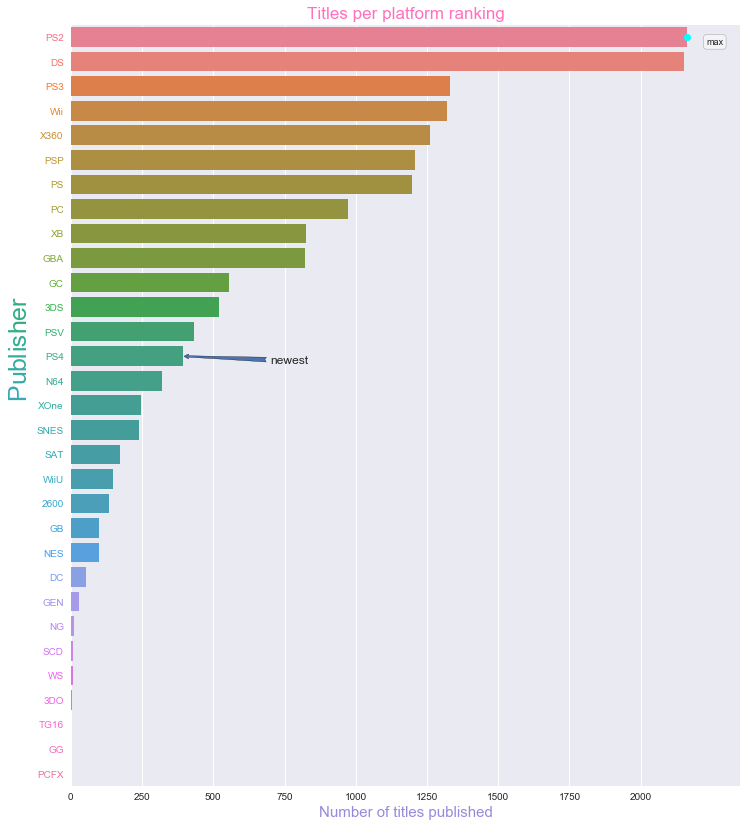

In [4]:
fig, ax= plt.subplots(figsize=(12,14)) #used to take care of the size
sns.barplot(x=gbyplat,y=gbyplat.index, palette='husl') #creating barplot
ax.set_ylabel('Publisher', color='deepskyblue', size=15, alpha=0.8) #setting labels
ax.set_xlabel('Number of titles published', color='slateblue', size=15, alpha=0.7)
ax.set_title('Titles per platform ranking', color='deeppink', size=17, alpha=0.6)
ax.set_xlim(0,2350) #setting limit for the plot
ax.set_xticks(np.arange(0, max(gbyplat), 250)) #ticks frequency
ax.annotate('newest', size=12, xy=(390, 13), xytext=(700, 13.3),
            arrowprops=dict(arrowstyle="fancy")) #annotations on plot
ax.annotate('max', size=9, xy=(2230,0.3), bbox=dict(boxstyle="round", fc="w", alpha=0.5))
ax.plot(2161,0, 'o', color='cyan') #creating the cricle highlight for PS2 max 

p = sns.color_palette("husl", len(gbyplat))
for i, label in enumerate(ax.get_yticklabels()):
    label.set_color(p[i])
rainbow_text(0,0.09, ["P", "u", "bl","is", "her"],
             [p[17],p[16],p[15],p[14], p[13]],
             size=25)


In [5]:
len(games.Publisher.unique())
#582 different publishers
gbypub=t=games.Publisher.dropna().value_counts()
gbypub

Electronic Arts                           1356
Activision                                 985
Namco Bandai Games                         939
Ubisoft                                    933
Konami Digital Entertainment               834
THQ                                        715
Nintendo                                   706
Sony Computer Entertainment                687
Sega                                       638
Take-Two Interactive                       422
Capcom                                     386
Atari                                      367
Tecmo Koei                                 348
Warner Bros. Interactive Entertainment     235
Square Enix                                234
Disney Interactive Studios                 218
Unknown                                    201
Midway Games                               198
Eidos Interactive                          198
Microsoft Game Studios                     191
505 Games                                  191
Acclaim Enter

#### Plotting data with use of braplot and line + added extra annotations

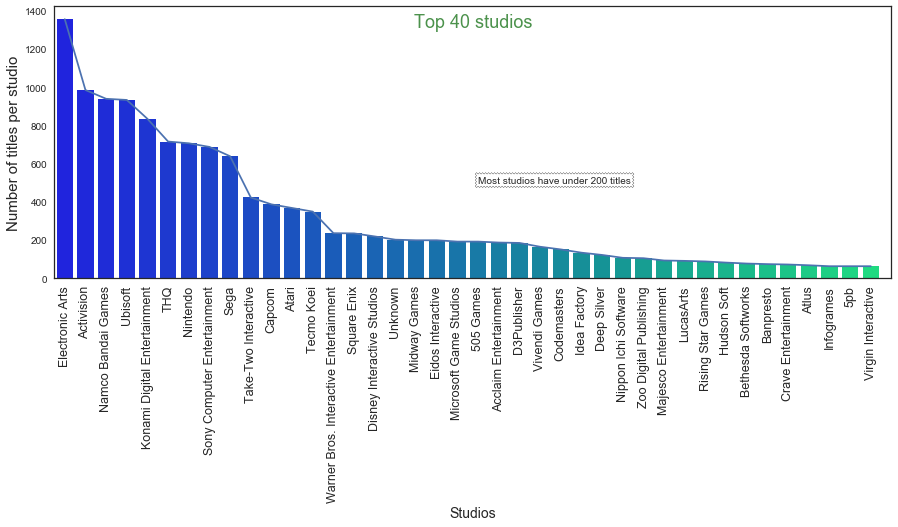

In [6]:
sns.set_style("white")
plt.figure(figsize=(15, 5))
sns.barplot(y=gbypub.iloc[:40],x=gbypub.iloc[:40].index, palette='winter')
gbypub.iloc[:40].plot()
plt.ylabel('Number of titles per studio', size=15)
plt.xlabel('Studios', size=14)
plt.title('Top 40 studios', alpha=0.7, x=0.5, y=0.9,color='darkgreen', size=18)
plt.xticks(rotation=90, size=12.5)
plt.annotate('Most studios have under 200 titles', xy=(20,500), bbox=dict(boxstyle='sawtooth', fc='w')) 



#looks like this way is not possible to get one yticklabel without creating ax, can do it ax.set_xtickslabels
plt.xlim(-0.5,40);
#this counts one title over many platforms
#zoom

#### Create barplot for publishers without duplicates (because the one above counted same titles buyt released on different platforms) Also and customizations to the plot (especialy colored line)

In [7]:
gnodupl=games.drop_duplicates(subset='Name')
gbpndupl=gnodupl.Publisher.dropna().value_counts() #creating series of games published withotu duplicates

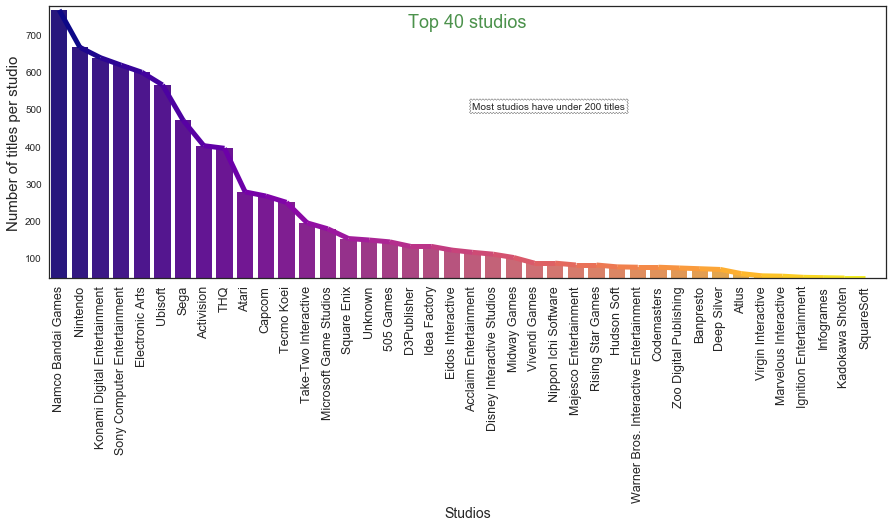

In [8]:
sns.set_style("white")
plt.figure(figsize=(15, 5))
sns.barplot(y=gbpndupl.iloc[:40],x=gbpndupl.iloc[:40].index, palette='plasma')
plt.ylabel('Number of titles per studio', size=15)
plt.xlabel('Studios', size=14)
plt.title('Top 40 studios', alpha=0.7, x=0.5, y=0.9,color='darkgreen', size=18)
plt.xticks(rotation=90, size=12.5)
plt.annotate('Most studios have under 200 titles', xy=(20,500), bbox=dict(boxstyle='sawtooth', fc='w')) 

#code for multi color line corresponding to the bars, can also set different norm to make it change color faster/slower than the bar
from matplotlib.collections import LineCollection
x=np.arange(40)
y=gbpndupl.iloc[:40]
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap='plasma')
lc.set_linewidth(5)
lc.set_array(x)
plt.xlim(-0.5,40)
plt.ylim(min(y), max(y)+10)
plt.gca().add_collection(lc);



#### Same as above but written in different syntax, using axes, no line

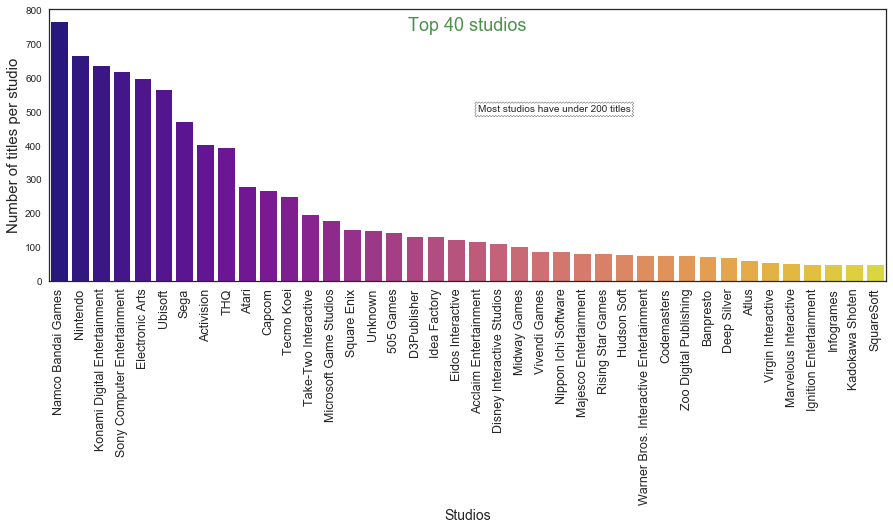

In [9]:
sns.set_style("white")
plt.subplots(figsize=(15,5))
ax=sns.barplot(y=gbpndupl.iloc[:40],x=gbpndupl.iloc[:40].index, palette='plasma')
ax.set_ylabel('Number of titles per studio', size=15)
ax.set_xlabel('Studios', size=14)
ax.set_title('Top 40 studios', alpha=0.7, x=0.5, y=0.9,color='darkgreen', size=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=12.5)
ax.annotate('Most studios have under 200 titles', xy=(20,500), bbox=dict(boxstyle='sawtooth', fc='w'));

Code for multicolored line only

Namco Bandai Games              765
Nintendo                        665
Konami Digital Entertainment    637
Sony Computer Entertainment     617
Electronic Arts                 598
Name: Publisher, dtype: int64


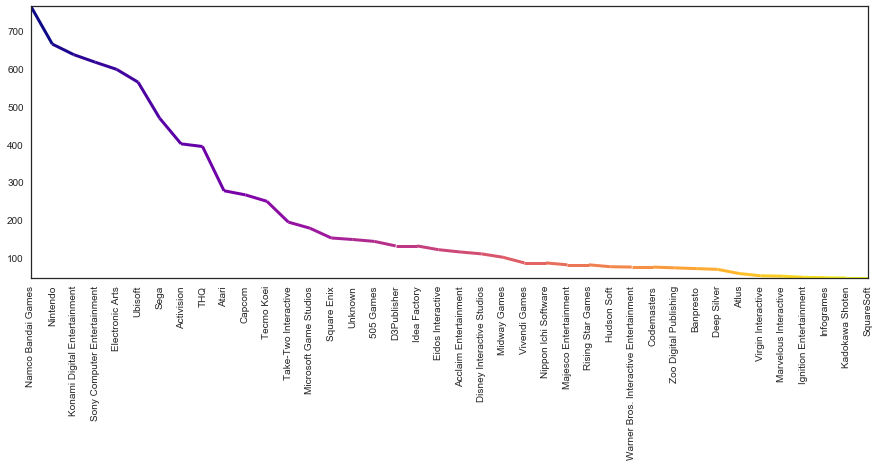

In [10]:
#this is to create multicolored line for series where one is flaot and the other column is string
print(gbpndupl.head())
from matplotlib.collections import LineCollection
plt.figure(figsize=(15, 5))
x=np.arange(40)
y=gbpndupl.iloc[:40]
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap='plasma',norm=plt.Normalize(0, 38))
lc.set_linewidth(3)
lc.set_array(x)
plt.xlim(min(x), max(x))
plt.ylim(min(y), max(y))
plt.gca().add_collection(lc)
labels=list(gbpndupl.iloc[:40].index)
plt.xticks(x, labels, rotation='vertical');

### Horizontal barplots
Below is an attempt to show how different the ranking would be without duplicates (some comapnies are down few spots, others are up and need to highlight this change)


Text(0.5,0,'Studios')

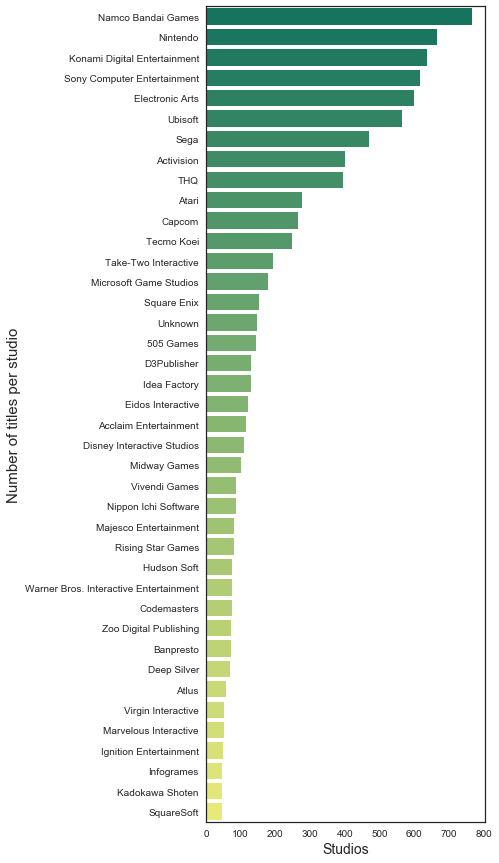

In [11]:
games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
gbypub=games.Publisher.dropna().value_counts()
gnodupl=games.drop_duplicates(subset='Name')
df1=pd.DataFrame(gbypub)
df2=pd.DataFrame(gbpndupl)
df1['Position'] = range(1, len(df1) + 1)
df2['Position'] = range(1, len(df2) + 1)
df2['Change']=df1['Position']-df2['Position']
pd.options.display.float_format = '{:,.0f}'.format
df=df2.iloc[:40]
ax = plt.figure(figsize=(5, 15))
sns.barplot(x=df['Publisher'], y=df.index, data=df, palette='summer')
plt.ylabel('Number of titles per studio', size=15)
plt.xlabel('Studios', size=14)

In [12]:
df2=pd.DataFrame(gbpndupl)
df1['Position'] = range(1, len(df1) + 1)
df2['Position'] = range(1, len(df2) + 1)
df2['Change']=df1['Position']-df2['Position']

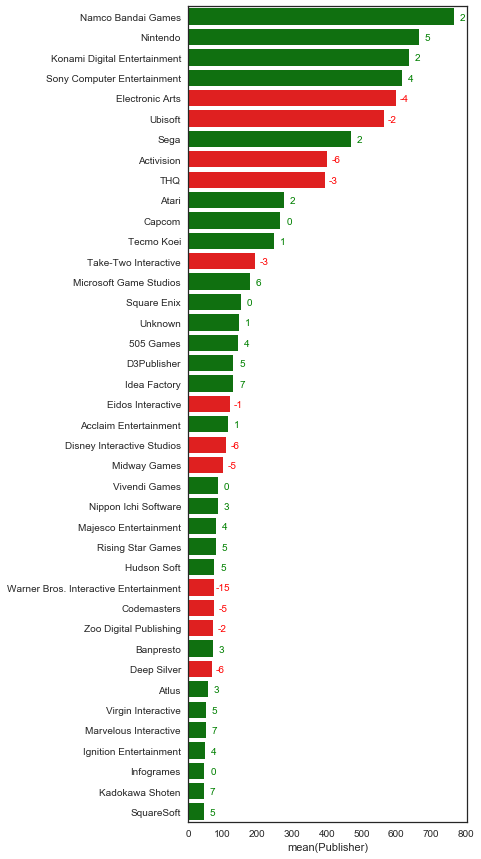

In [16]:
pd.options.display.float_format = '{:,.0f}'.format
ax = plt.figure(figsize=(5, 15))


# Create example DataFrame

# Create list of colors based on a condition 
colors = ['red' if (x < 0) else 'green' for x in df['Change']]

# Create barplot 
ax = sns.barplot(x=df['Publisher'], y=df.index, data=df, palette=colors)
# Annotate every single Bar with its value, based on it's width           
z=0
for p in ax.patches:
    width = p.get_width()
    if df.iloc[z]['Change'] < 0:
        clr = 'red'
    else:
        clr = 'green'

    plt.text(25+p.get_width(), p.get_y()+0.55*p.get_height(),
                     int(df['Change'][z]),
                     ha='center', va='center', color=clr)
    z=z+1